# Mortgage PD scorecard

## Import libraries

In [295]:
%reset

In [296]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Step 1: Data Preparation

### Step 1.1: Data Loading

In [297]:
# Load the dataset
file_path = "data/mortgage_sample.csv"  # replace with the actual path or URL
df_raw = pd.read_csv(file_path)

In [298]:
df_raw.head()

,id,time,orig_time,first_time,mat_time,balance_time,LTV_time,interest_rate_time,hpi_time,gdp_time,...,investor_orig_time,balance_orig_time,FICO_orig_time,LTV_orig_time,Interest_Rate_orig_time,hpi_orig_time,default_time,payoff_time,status_time,sample
0,1,25,-7,25,113,41303.42,24.498336,9.2,226.29,2.899137,...,0,45000.0,715,69.4,9.2,87.03,0.0,0.0,0.0,public
1,1,26,-7,25,113,41061.95,24.483867,9.2,225.10,2.151365,...,0,45000.0,715,69.4,9.2,87.03,0.0,0.0,0.0,public
2,1,27,-7,25,113,40804.42,24.626795,9.2,222.39,2.361722,...,0,45000.0,715,69.4,9.2,87.03,0.0,0.0,0.0,public
3,1,28,-7,25,113,40483.89,24.735883,9.2,219.67,1.229172,...,0,45000.0,715,69.4,9.2,87.03,0.0,0.0,0.0,public
4,1,29,-7,25,113,40367.06,24.925476,9.2,217.37,1.692969,...,0,45000.0,715,69.4,9.2,87.03,0.0,0.0,0.0,public


In [299]:
# Display basic information about the dataset
print("\nDataset Information:")
df_raw.info()


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 622489 entries, 0 to 622488
Data columns (total 24 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       622489 non-null  int64  
 1   time                     622489 non-null  int64  
 2   orig_time                622489 non-null  int64  
 3   first_time               622489 non-null  int64  
 4   mat_time                 622489 non-null  int64  
 5   balance_time             622489 non-null  float64
 6   LTV_time                 622219 non-null  float64
 7   interest_rate_time       622489 non-null  float64
 8   hpi_time                 622489 non-null  float64
 9   gdp_time                 622489 non-null  float64
 10  uer_time                 622489 non-null  float64
 11  REtype_CO_orig_time      622489 non-null  int64  
 12  REtype_PU_orig_time      622489 non-null  int64  
 13  REtype_SF_orig_time      622489 non-n

In [300]:
# Filter out private observations
df_public = df_raw[df_raw['sample'] == 'public']
df_public = df_public.drop(['sample'], axis=1)

#### Filter out ids which end with status_code==0. It means that the loan is still active and we don't know if it will default or not. We can't use this data for training.

In [301]:
filtered_ids = df_public.groupby('id')['status_time'].sum()[lambda x: x > 0].index
df_dev = df_public[df_public['id'].isin(filtered_ids)]

### Step 1.2: Data Exploration

In [302]:
# Display summary statistics
print("\nSummary Statistics:")
df_dev.describe()


Summary Statistics:


,id,time,orig_time,first_time,mat_time,balance_time,LTV_time,interest_rate_time,hpi_time,gdp_time,...,REtype_SF_orig_time,investor_orig_time,balance_orig_time,FICO_orig_time,LTV_orig_time,Interest_Rate_orig_time,hpi_orig_time,default_time,payoff_time,status_time
count,342027.000000,342027.000000,342027.000000,342027.000000,342027.000000,3.420270e+05,341971.000000,342027.000000,342027.000000,342027.000000,...,342027.000000,342027.000000,3.420270e+05,342027.000000,342027.000000,342027.000000,342027.000000,342027.000000,342027.000000,342027.000000
mean,24568.108570,31.138162,20.059981,23.445421,136.700500,2.590125e+05,81.217144,7.054329,189.585114,1.410181,...,0.612972,0.127154,2.670999e+05,672.249667,79.143273,5.583407,196.079591,0.039833,0.070009,0.179851
std,13627.324103,9.393406,7.298112,6.014540,18.788973,2.216568e+05,23.538631,1.876843,29.075380,2.029758,...,0.487071,0.333146,2.275251e+05,71.950202,9.914621,3.106879,34.496150,0.195567,0.255163,0.536212
min,1.000000,1.000000,-40.000000,1.000000,23.000000,0.000000e+00,0.000000,0.000000,107.830000,-4.146711,...,0.000000,0.000000,0.000000e+00,400.000000,50.100000,0.000000,75.710000,0.000000,0.000000,0.000000
25%,13066.000000,25.000000,17.000000,20.000000,136.000000,1.117557e+05,66.091130,5.875000,161.000000,1.104163,...,0.000000,0.000000,1.160000e+05,624.000000,75.000000,4.875000,179.450000,0.000000,0.000000,0.000000
50%,24292.000000,30.000000,22.000000,24.000000,141.000000,1.963633e+05,79.944960,6.875000,188.370000,1.850689,...,1.000000,0.000000,2.000000e+05,675.000000,80.000000,6.300000,212.730000,0.000000,0.000000,0.000000
75%,36706.000000,37.000000,25.000000,28.000000,145.000000,3.563412e+05,97.400294,8.000000,217.370000,2.899137,...,1.000000,0.000000,3.680000e+05,728.000000,80.000000,7.500000,222.390000,0.000000,0.000000,0.000000
max,49984.000000,60.000000,60.000000,60.000000,229.000000,8.701859e+06,248.432000,37.500000,226.290000,5.132464,...,1.000000,1.000000,8.000000e+06,840.000000,178.600000,18.000000,226.290000,1.000000,1.000000,2.000000


#### New features

In [303]:
# balance orig time cannot be 0
df_dev = df_dev[df_dev['balance_orig_time'] > 0]

df_dev['time_until_mat'] = df_dev['mat_time'] - df_dev['time']
df_dev['time_since_orig'] = df_dev['time'] - df_dev['orig_time']
df_dev['balance_paid'] = df_dev['balance_orig_time'] - df_dev['balance_time']
df_dev['balance_paid_perc'] = df_dev['balance_paid'] / df_dev['balance_orig_time']

In [304]:
df_dev[['balance_orig_time', 'time_until_mat', 'time_since_orig','balance_paid', 'balance_paid_perc']].describe()

,balance_orig_time,time_until_mat,time_since_orig,balance_paid,balance_paid_perc
count,3.419710e+05,341971.000000,341971.000000,3.419710e+05,341971.000000
mean,2.671436e+05,105.564855,11.076167,8.095067e+03,0.033554
std,2.275180e+05,19.284706,9.079739,3.840212e+04,0.096449
min,6.246000e+03,1.000000,0.000000,-7.018592e+05,-2.655358
25%,1.160000e+05,103.000000,5.000000,2.716000e+01,0.000126
50%,2.000000e+05,111.000000,8.000000,1.251710e+03,0.008270
75%,3.680000e+05,115.000000,15.000000,5.378470e+03,0.030542
max,8.000000e+06,198.000000,92.000000,2.251328e+06,1.000000


In [305]:
# Check for missing values
print("\nMissing Values:")
df_dev.isnull().sum()


Missing Values:


id                         0
time                       0
orig_time                  0
first_time                 0
mat_time                   0
balance_time               0
LTV_time                   0
interest_rate_time         0
hpi_time                   0
gdp_time                   0
uer_time                   0
REtype_CO_orig_time        0
REtype_PU_orig_time        0
REtype_SF_orig_time        0
investor_orig_time         0
balance_orig_time          0
FICO_orig_time             0
LTV_orig_time              0
Interest_Rate_orig_time    0
hpi_orig_time              0
default_time               0
payoff_time                0
status_time                0
time_until_mat             0
time_since_orig            0
balance_paid               0
balance_paid_perc          0
dtype: int64

In [306]:
# Count the number of rows with missing values
null_rows = df_dev.isnull().any(axis=0)
print("\nNumber of rows with missing values:", null_rows.sum())


Number of rows with missing values: 0


In [307]:
# First, select numerical variables only
num_vars = df_dev.select_dtypes(include=['float64', 'int64']).drop(columns=['id']).columns

print("\nDescriptive statistics:")
df_dev[num_vars].describe()


Descriptive statistics:


,time,orig_time,first_time,mat_time,balance_time,LTV_time,interest_rate_time,hpi_time,gdp_time,uer_time,...,LTV_orig_time,Interest_Rate_orig_time,hpi_orig_time,default_time,payoff_time,status_time,time_until_mat,time_since_orig,balance_paid,balance_paid_perc
count,341971.000000,341971.000000,341971.000000,341971.000000,3.419710e+05,341971.000000,341971.000000,341971.000000,341971.000000,341971.000000,...,341971.000000,341971.000000,341971.000000,341971.000000,341971.000000,341971.000000,341971.000000,341971.000000,3.419710e+05,341971.000000
mean,31.138421,20.062254,23.445166,136.703276,2.590485e+05,81.217144,7.053682,189.582296,1.410152,6.083682,...,79.142818,5.583249,196.091687,0.039825,0.070006,0.179837,105.564855,11.076167,8.095067e+03,0.033554
std,9.393946,7.296521,6.015000,18.787551,2.216570e+05,23.538631,1.876209,29.075080,2.029818,1.875841,...,9.914030,3.106386,34.485983,0.195548,0.255157,0.536198,19.284706,9.079739,3.840212e+04,0.096449
min,1.000000,-40.000000,1.000000,23.000000,0.000000e+00,0.000000,0.000000,107.830000,-4.146711,3.800000,...,50.100000,0.000000,75.710000,0.000000,0.000000,0.000000,1.000000,0.000000,-7.018592e+05,-2.655358
25%,25.000000,17.000000,20.000000,136.000000,1.117887e+05,66.091130,5.875000,161.000000,1.104163,4.700000,...,75.000000,4.875000,179.450000,0.000000,0.000000,0.000000,103.000000,5.000000,2.716000e+01,0.000126
50%,30.000000,22.000000,24.000000,141.000000,1.963990e+05,79.944960,6.875000,188.370000,1.850689,5.000000,...,80.000000,6.300000,212.730000,0.000000,0.000000,0.000000,111.000000,8.000000,1.251710e+03,0.008270
75%,37.000000,25.000000,28.000000,145.000000,3.563815e+05,97.400294,8.000000,217.370000,2.899137,7.800000,...,80.000000,7.500000,222.390000,0.000000,0.000000,0.000000,115.000000,15.000000,5.378470e+03,0.030542
max,60.000000,60.000000,60.000000,229.000000,8.701859e+06,248.432000,37.500000,226.290000,5.132464,10.000000,...,178.600000,18.000000,226.290000,1.000000,1.000000,2.000000,198.000000,92.000000,2.251328e+06,1.000000


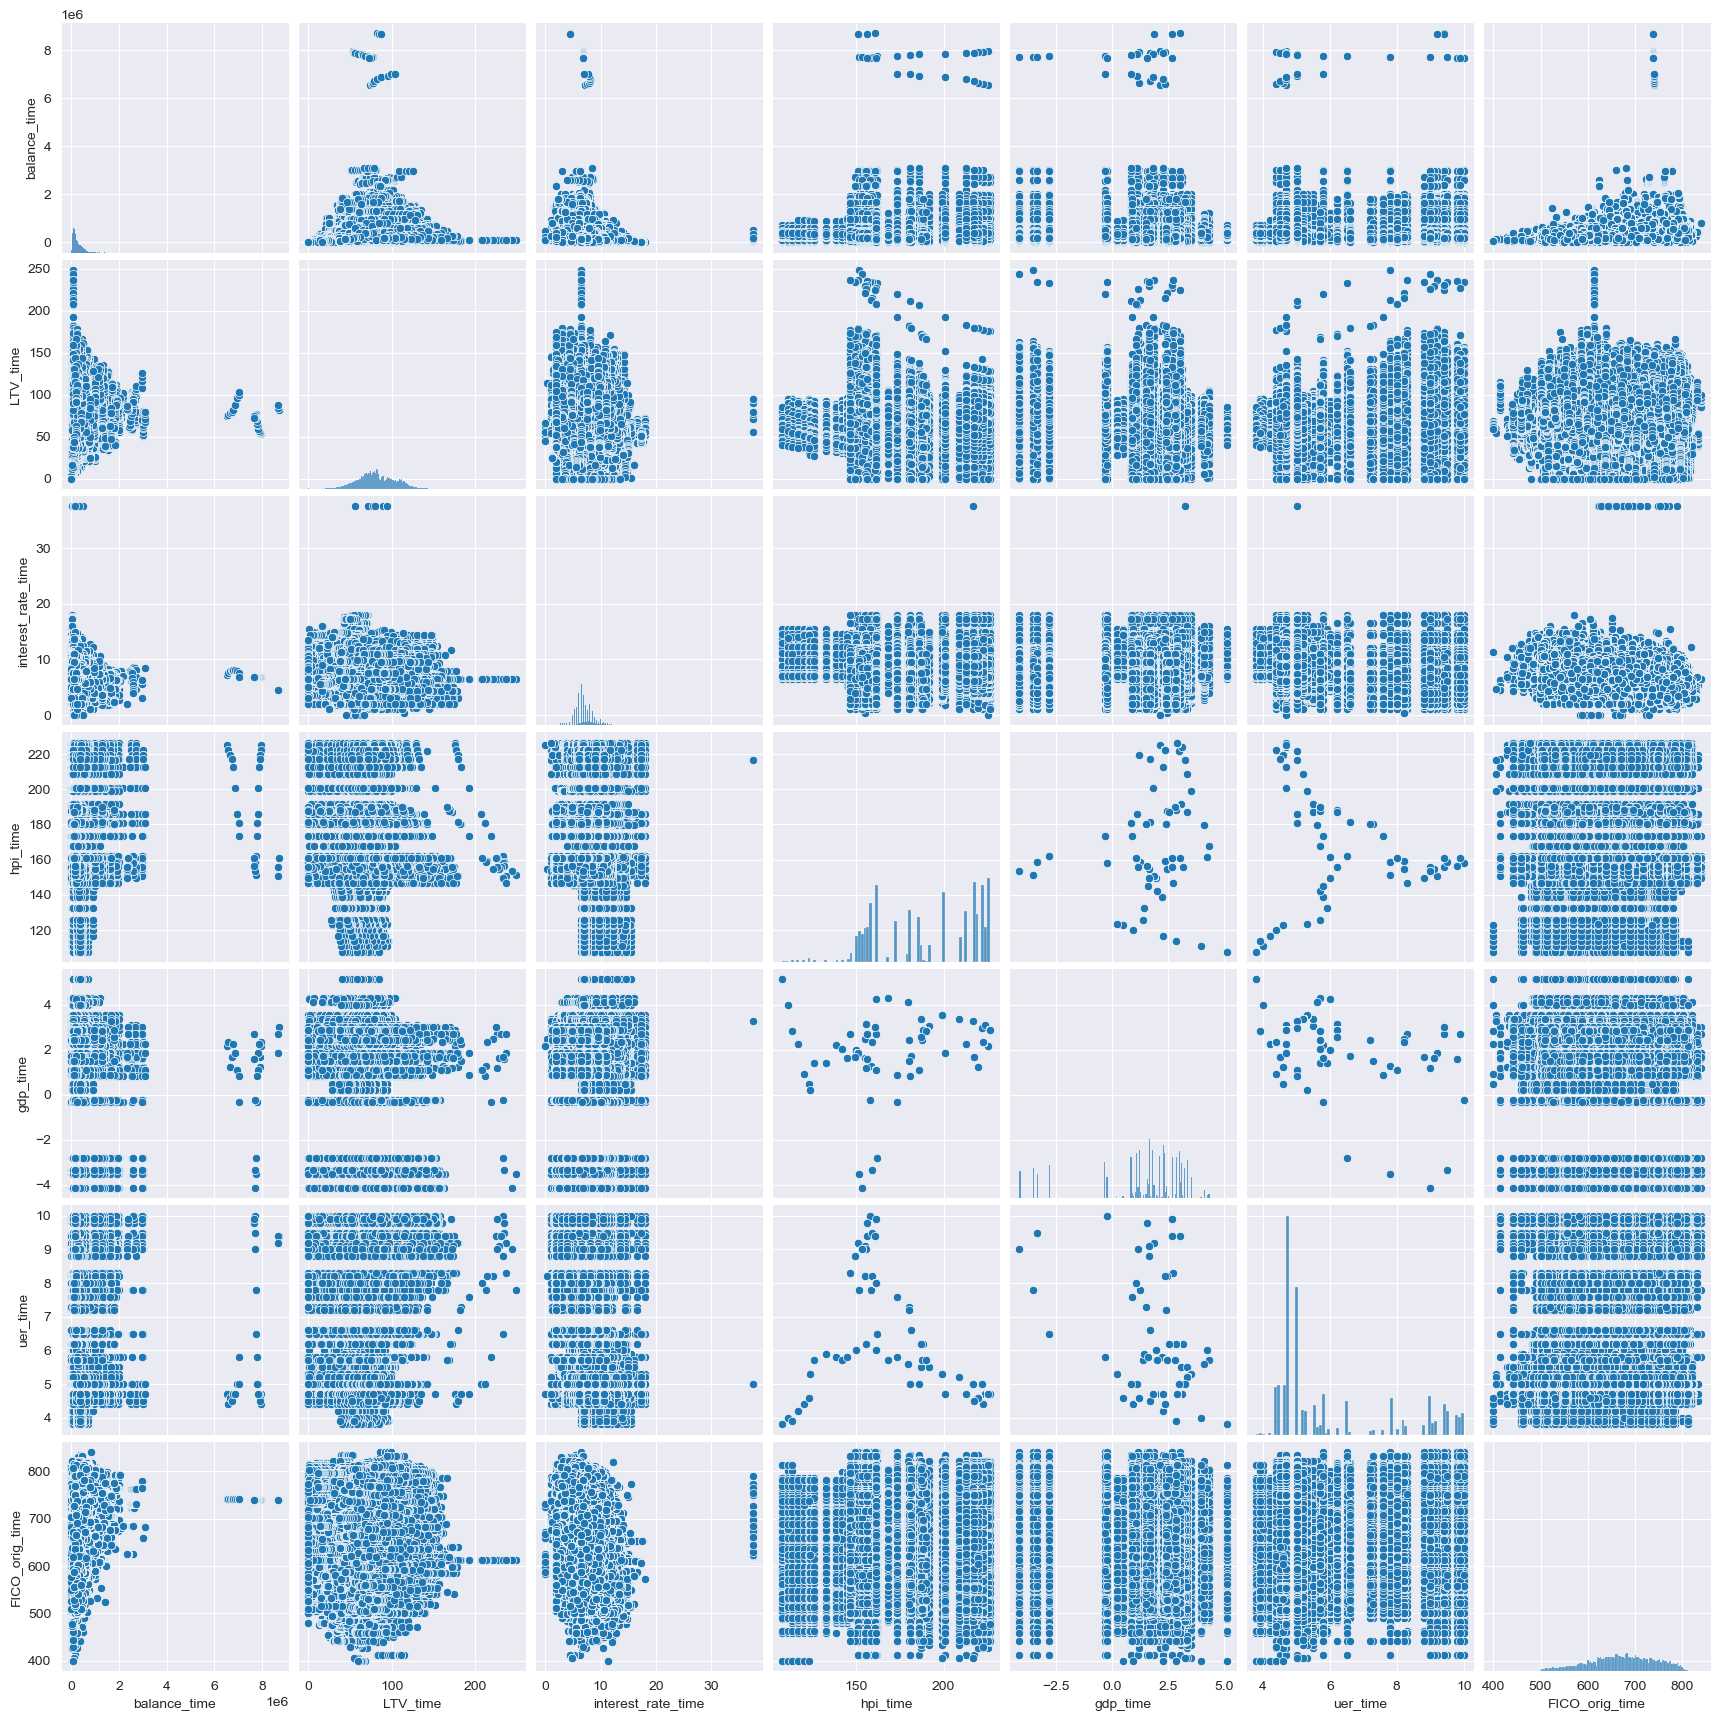

In [308]:
# Pairplot for numeric variables
sns.pairplot(df_dev[['balance_time', 'LTV_time', 'interest_rate_time', 'hpi_time', 'gdp_time', 'uer_time', 'FICO_orig_time']])
plt.show()


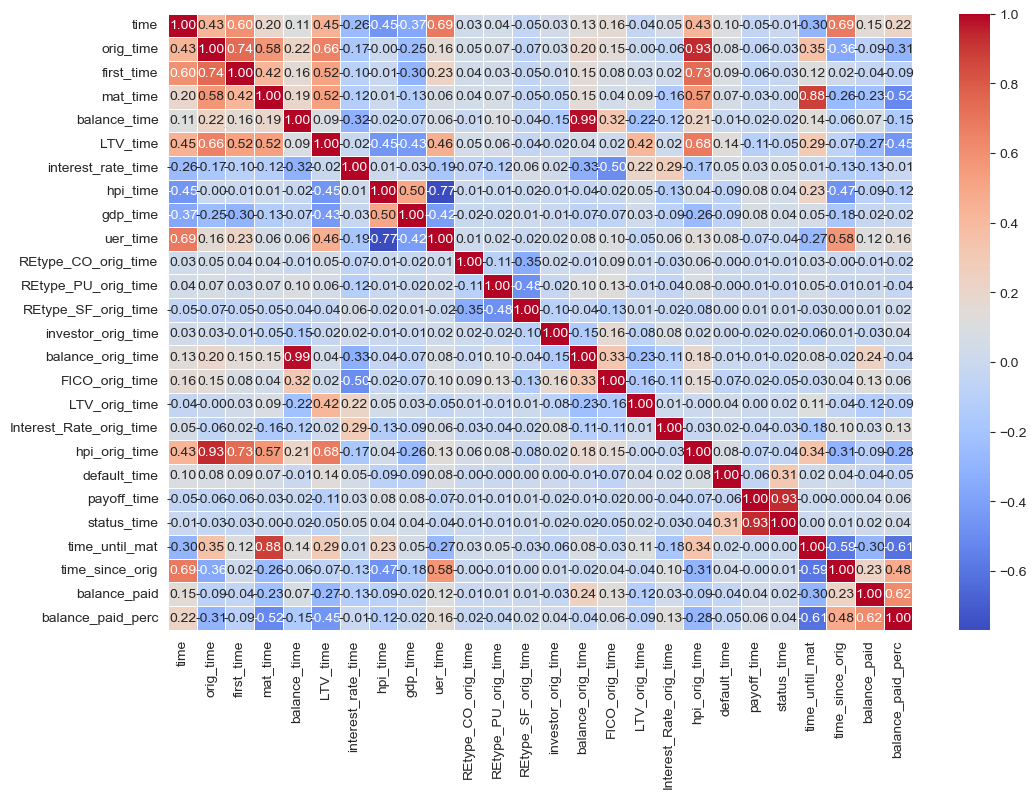

In [309]:
 # Correlation heatmap
correlation_matrix = df_dev.drop(columns=['id']).corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.show()


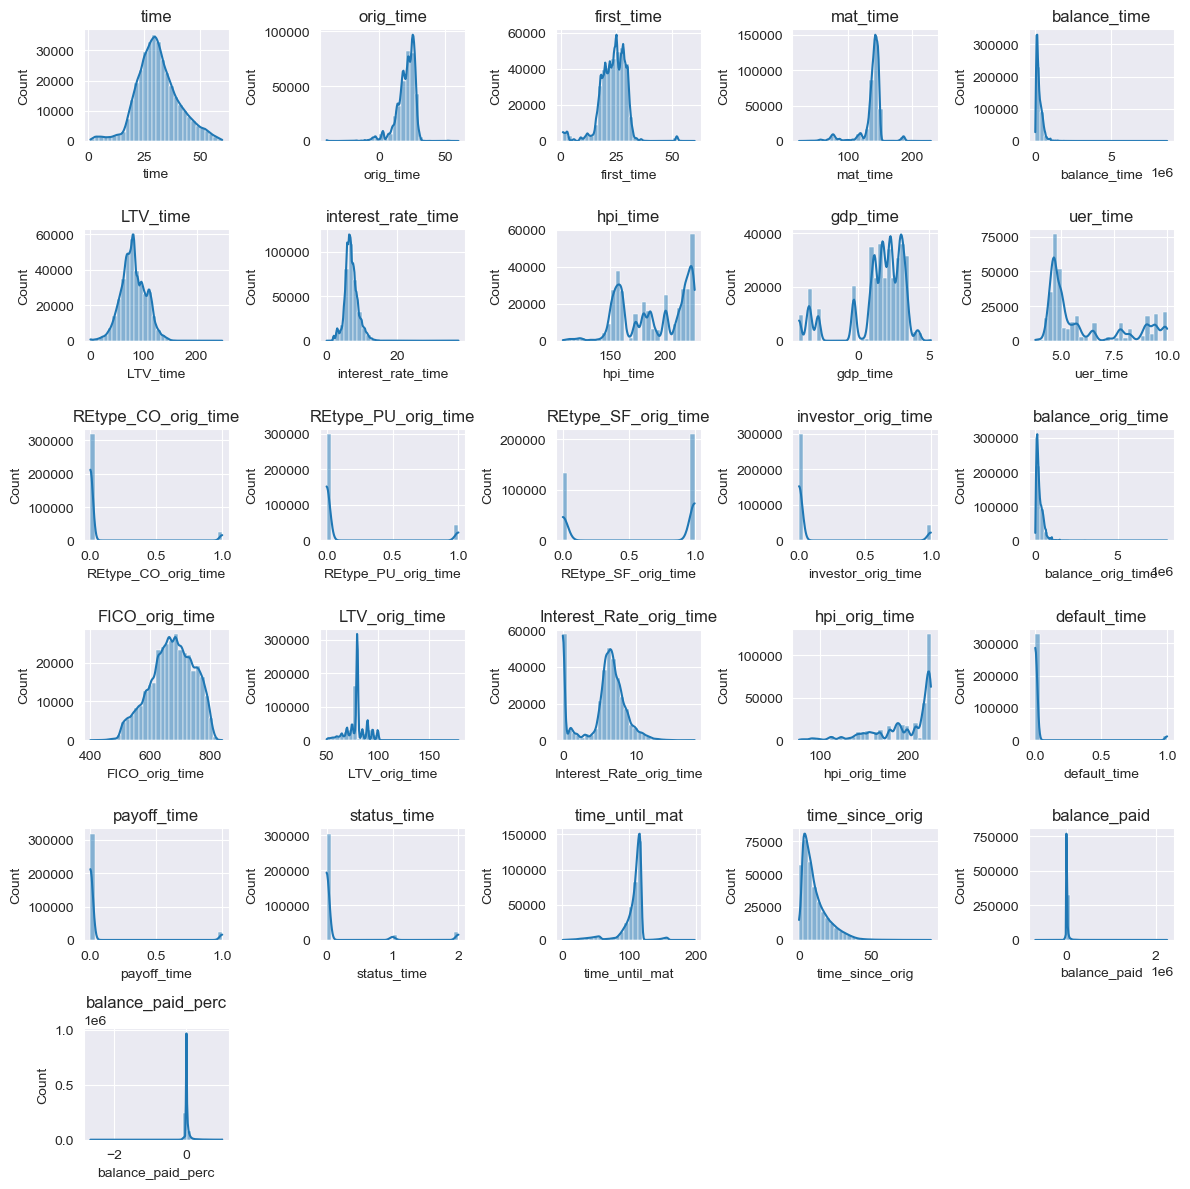

In [311]:
# Plot distributions
plt.figure(figsize=(12, 12))

for i, feature in enumerate(num_vars, 1):
    plt.subplot(6, 5, i)
    sns.histplot(df_dev[feature], bins=30, kde=True)
    plt.title(f'{feature}')
    plt.xlabel(feature)

plt.tight_layout()  # Add this line to prevent subplot overlap
plt.show()

In [ ]:
# Group by home type and calculate the mean FICO score within each home type
home_type_fico_mean = df_dev.groupby(['REtype_SF_orig_time'])['FICO_orig_time'].mean()
print(home_type_fico_mean)

In [ ]:
# TODO: попробовать разные вариации с типом домов и мб другими переменными (пример выше из docs/mortgage_data_inspection.py)

### Step 1.3: Target construction

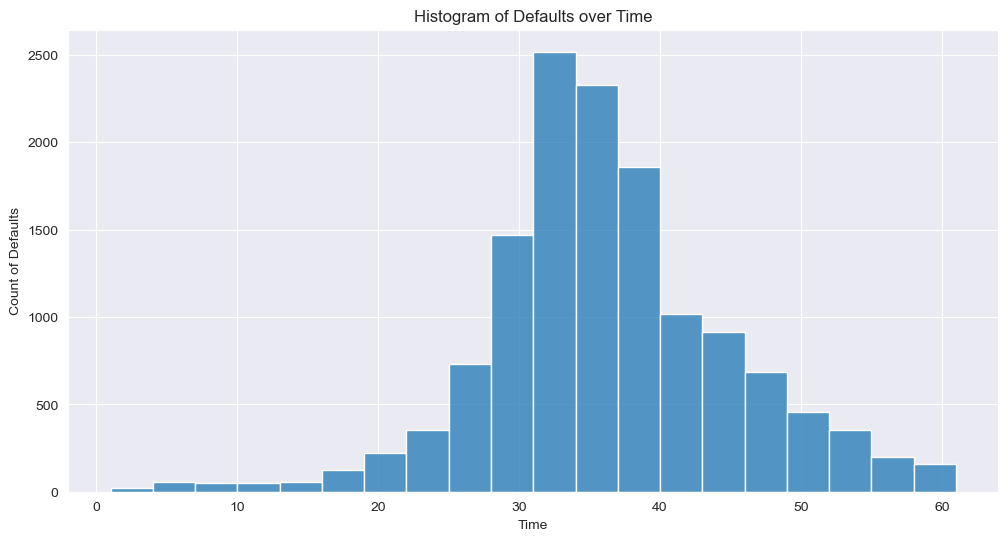

In [312]:
plt.figure(figsize=(12, 6))
sns.histplot(df_dev[df_dev['default_time'] == 1]['time'], binwidth=3, kde=False)
plt.title('Histogram of Defaults over Time')
plt.xlabel('Time')
plt.ylabel('Count of Defaults')
plt.show()

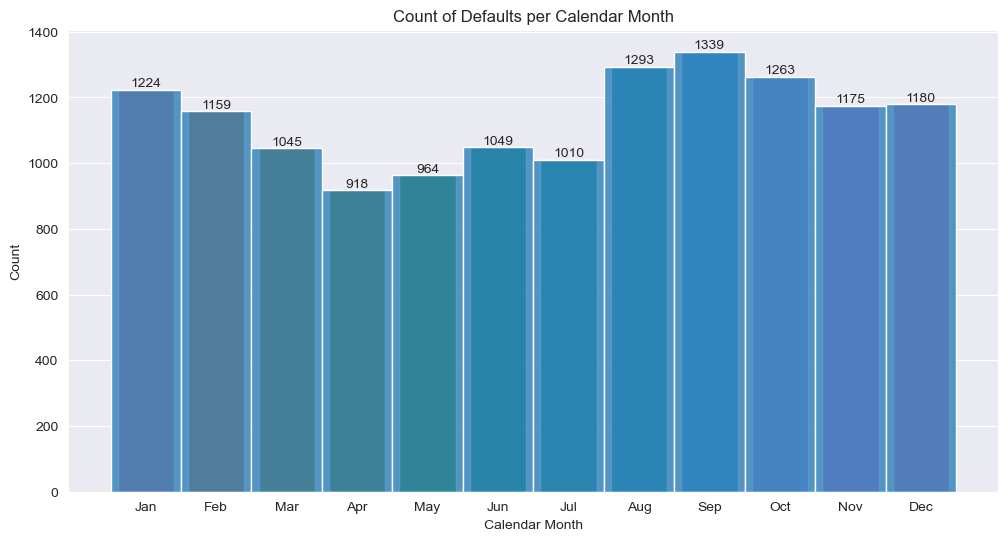

In [313]:
df_dev['calendar_month'] = df_dev['time'] % 12  # Extract the month from the 'time' column

# Filter data where 'default_time' is 1
default_df = df_dev[df_dev['default_time'] == 1]
count_per_month = default_df['calendar_month'].value_counts().sort_index()

# Plot histogram
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=count_per_month.index, y=count_per_month.values)
sns.histplot(default_df['calendar_month'], bins=range(13), kde=False, discrete=True)
plt.title('Count of Defaults per Calendar Month')
plt.xlabel('Calendar Month')
plt.ylabel('Count')
plt.xticks(range(12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

for i, value in enumerate(count_per_month.values):
    ax.text(i, value + 0.1, str(value), ha='center', va='bottom')
    
plt.show()

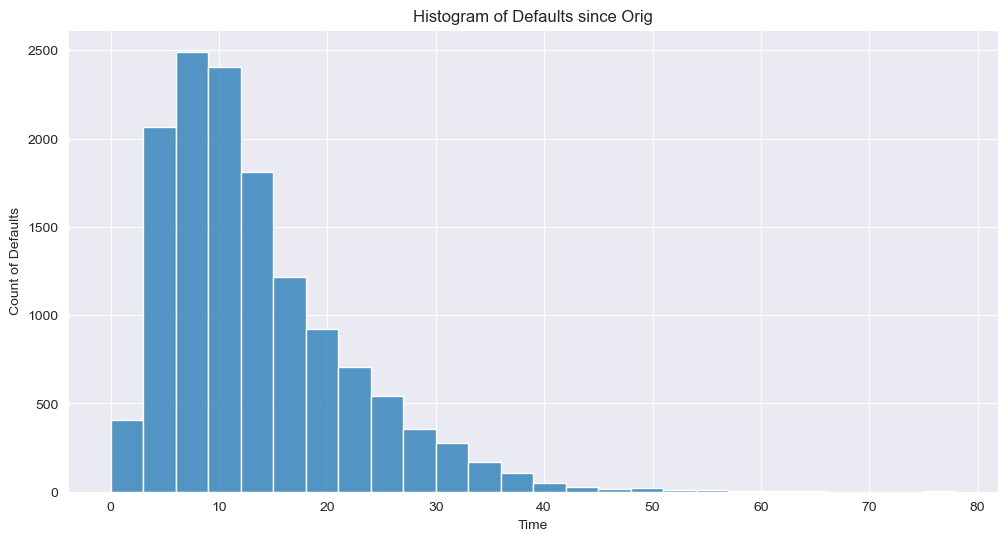

In [314]:
plt.figure(figsize=(12, 6))
sns.histplot(df_dev[df_dev['default_time'] == 1]['time_since_orig'], binwidth=3, kde=False)
plt.title('Histogram of Defaults since Orig')
plt.xlabel('Time')
plt.ylabel('Count of Defaults')
plt.show()

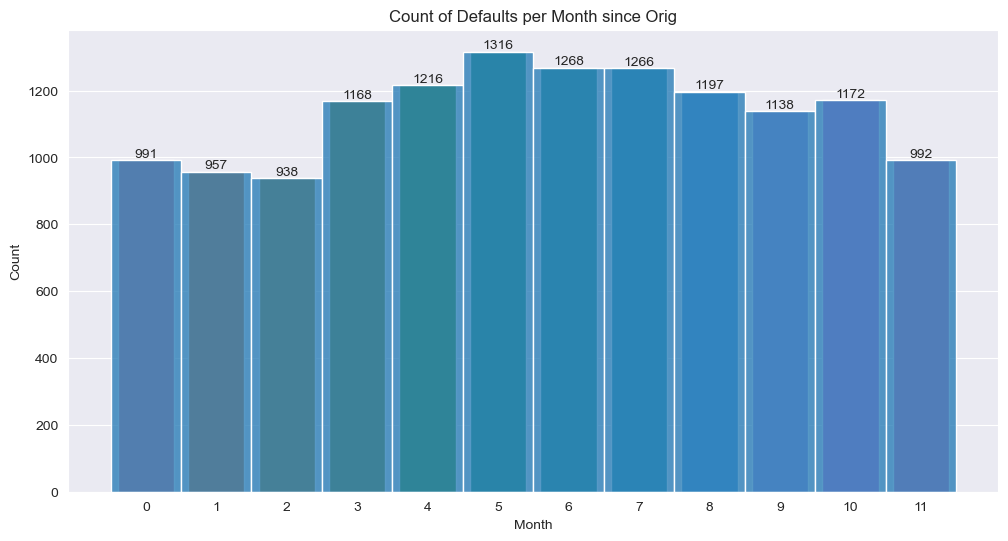

In [315]:
df_dev['month_since_orig'] = df_dev['time_since_orig'] % 12  # Extract the month from the 'time' column

# Filter data where 'default_time' is 1
default_df = df_dev[df_dev['default_time'] == 1]
count_per_month = default_df['month_since_orig'].value_counts().sort_index()

# Plot histogram
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=count_per_month.index, y=count_per_month.values)
sns.histplot(default_df['month_since_orig'], bins=range(13), kde=False, discrete=True)
plt.title('Count of Defaults per Month since Orig')
plt.xlabel('Month')
plt.ylabel('Count')

for i, value in enumerate(count_per_month.values):
    ax.text(i, value + 0.1, str(value), ha='center', va='bottom')

plt.show()

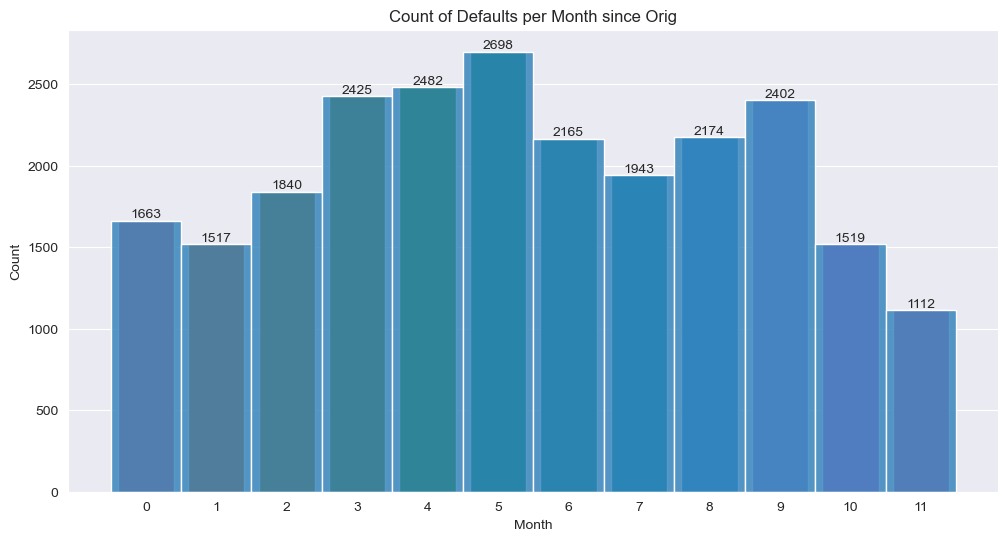

In [316]:
# Filter data where 'default_time' is 1
payoff_df = df_dev[df_dev['payoff_time'] == 1]
count_per_month = payoff_df['month_since_orig'].value_counts().sort_index()

# Plot histogram
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=count_per_month.index, y=count_per_month.values)
sns.histplot(payoff_df['month_since_orig'], bins=range(13), kde=False, discrete=True)
plt.title('Count of Defaults per Month since Orig')
plt.xlabel('Month')
plt.ylabel('Count')

for i, value in enumerate(count_per_month.values):
    ax.text(i, value + 0.1, str(value), ha='center', va='bottom')

plt.show()

Let's choose as a cohort the time since origination. We will check if the client defaulted in the every next 12 months since origination.

#### Building target variable

##### Check initial distribution of defaulted clients

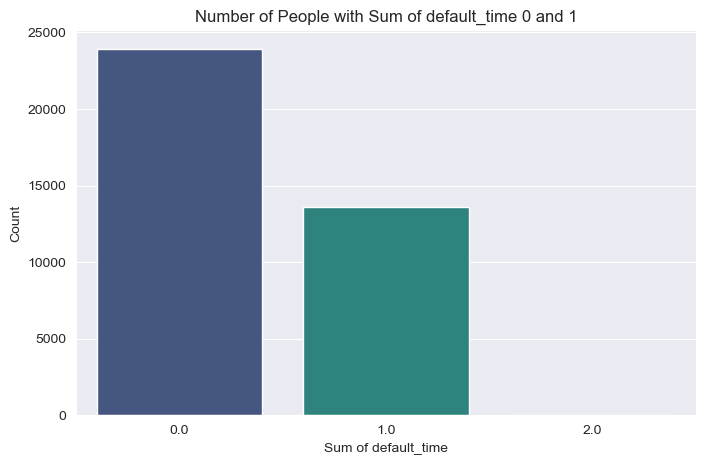

In [317]:
# Group by 'id' and calculate the sum of 'default_time'
df_default_sum = df_dev.groupby('id')['default_time'].sum()

# Plot bar chart
plt.figure(figsize=(8, 5))
sns.countplot(x=df_default_sum, palette='viridis')
plt.title('Number of People with Sum of default_time 0 and 1')
plt.xlabel('Sum of default_time')
plt.ylabel('Count')
plt.show()

The distribution of defaulted clients is imbalanced.

Also, we can see that there are clients who defaulted more than once. Let's check how many of them are there, and drop them from the dataset.

In [318]:
# Filter out clients who defaulted more than once
print("Number of clients who defaulted more than once:", len(df_default_sum[df_default_sum > 1]))

Number of clients who defaulted more than once: 4


In [319]:
# Drop clients who defaulted more than once
df_dev = df_dev[~df_dev['id'].isin(df_default_sum[df_default_sum > 1].index)]

##### Target logic

If the client defaults (default_time == 1) within 12-months-window since origination, then we will mark the cohort as 1, otherwise 0.

In [320]:
df_dev['target'] = 0

In [321]:
def mark_defaults(df):
    # Create a copy of the DataFrame
    df_copy = df.copy()

    # Group by id and take the last observation per id
    last_observation = df.groupby('id').last()

    # Mark rows where the last observation has 'default_time' equal to 1
    defaulted_ids = last_observation[last_observation['default_time'] == 1].index

    # Iterate over defaulted_ids and update 'target' column accordingly
    for defaulted_id in defaulted_ids:
        # Filter rows for the current defaulted_id
        df_id = df_copy[df_copy['id'] == defaulted_id]

        # Find the value of 'month_since_orig' for the last observation
        last_month_since_orig = df_id['month_since_orig'].tail(1).values[0]

        # Set the 'target' column to 1 in the last n+1 rows
        df_copy.loc[df_id.index[-(last_month_since_orig+1):], 'target'] = 1

    return df_copy


In [322]:
df_dev = mark_defaults(df_dev)

### Step 1.4: Setting Cohort

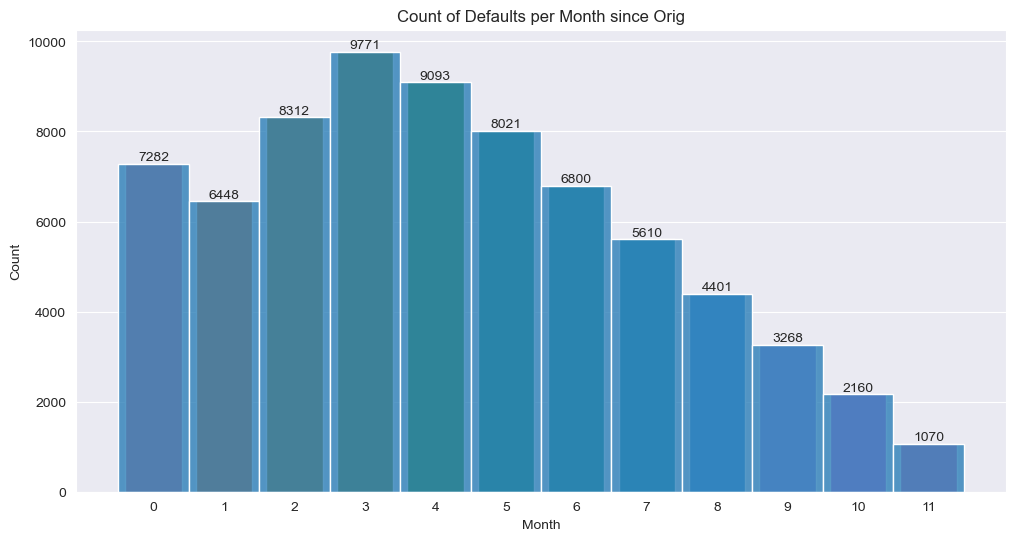

In [323]:
# Filter data where 'target' is 1
default_df = df_dev[df_dev['target'] == 1]
count_per_month = default_df['month_since_orig'].value_counts().sort_index()

# Plot histogram
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=count_per_month.index, y=count_per_month.values)
sns.histplot(default_df['month_since_orig'], bins=range(13), kde=False, discrete=True)
plt.title('Count of Defaults per Month since Orig')
plt.xlabel('Month')
plt.ylabel('Count')

for i, value in enumerate(count_per_month.values):
    ax.text(i, value + 0.1, str(value), ha='center', va='bottom')

plt.show()

Let's choose a flexible cohort – every 4th month since origination

In [325]:
df_dev = df_dev[df_dev['month_since_orig'] == 3]

# Drop columns that we don't need anymore
df_dev.drop(columns=['id', 'time', 'orig_time', 'first_time', 'mat_time', 'default_time', 'payoff_time', 'status_time', 'calendar_month', 'month_since_orig'], inplace=True)

Distribution of target:
0    28944
1     9771
Name: target, dtype: int64


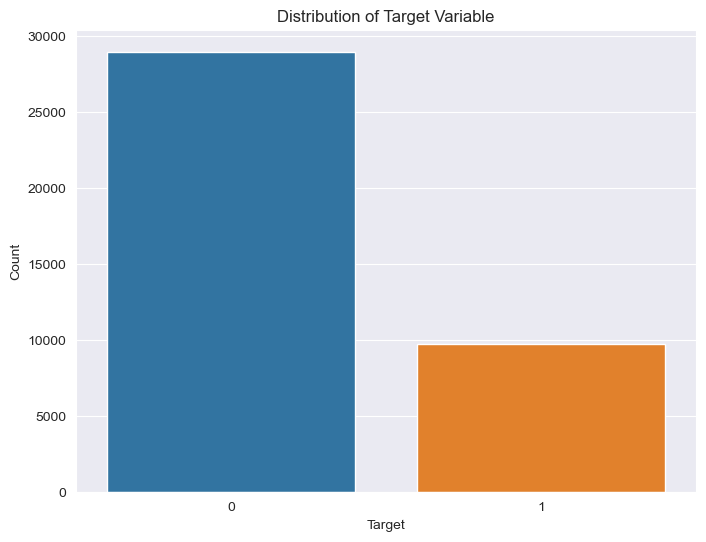

In [326]:
print("Distribution of target:", df_dev['target'].value_counts(), sep='\n')

plt.figure(figsize=(8, 6))
sns.countplot(x='target', data=df_dev)
plt.title('Distribution of Target Variable')
plt.xlabel('Target')
plt.ylabel('Count')
plt.show()

The target distribution is imbalanced. Most of the clients didn't default.

In [ ]:
# TODO: Outlier Treatment
# TODO: Binning
# TODO: Correlation Analysis
# TODO: Feature Selection
# TODO: Model training